In [1]:
import os
from math import isnan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ptest(list1, list2):
    '''P-Test to see if difference between 2 dataset is significant at 99% C.I.'''
    var1 = np.var(list1)
    var2 = np.var(list2)
    std12 = np.sqrt(var1+var2)
    obs = np.mean(list1)-np.mean(list2)
    z = abs(obs/std12)
    if z>3:
        return True
    else:
        return False
    
def corr(list1, list2):
    '''Find correlation between 2 datasets. Removes NaNs'''
    #Remove Nan:
    new_list1 = []
    new_list2 = []
    for i1,i2 in zip(list1,list2):
        if (isnan(i1)==False) & (isnan(i2)==False):
            new_list1.append(i1)
            new_list2.append(i2)
    cov = np.cov([new_list1,new_list2])
    std1 = np.std(new_list1)
    std2 = np.std(new_list2)
    corr_matrix = cov/(std1*std2)
    corr = corr_matrix[0][1]
    return corr

##Analyzing Sheets

In [3]:
path = '/home/sadat/Desktop/Hackathon/Hack-a-thon_Dataset_2016.xlsx'
xl = pd.ExcelFile(path)
names = xl.sheet_names
names

[u'Basic Metadata',
 u'Data Notes',
 u'Useful Links',
 u'Lenses of Health Equity',
 u'Critical Pathways',
 u'Trended 3-4-50 Chronic Disease',
 u'Asthma_Death_2010-2013',
 u'Asthma_EDD_2010-2013',
 u'Asthma_Hosp_2010-2013',
 u'CHD_Death_2010-2013',
 u'CHD_EDD_2010-2013',
 u'CHD_Hosp_2010-2013',
 u'COPD_Death_2010-2013',
 u'COPD_EDD_2010-2013',
 u'COPD_Hosp_2010-2013',
 u'Diabetes_Death_2010-2013',
 u'Diabetes_EDD_2010-2013',
 u'Diabetes_Hosp_2010-2013',
 u'Overall Cancer_Death_2010-2013',
 u'Overall Cancer_EDD_2010-2013',
 u'Overall Cancer_Hosp_2010-2013',
 u'Stroke_Death_2010-2013',
 u'Stroke_EDD_2010-2013',
 u'Stroke_Hosp_2010-2013',
 u'Behaviors Data ',
 u'Age, Gender, RaceEthnicity',
 u'Demographics and Economics',
 u'SES_Urbanicity Pop for Rate',
 u'Population Forecasts']

##Asthma Statistics

###Analyze Deaths

In [4]:
dat = pd.read_excel(path, sheetname='CHD_Death_2010-2013')
dat.columns

Index([                   u'CONDITION',                      u'OUTCOME',
                               u'YEAR',                    u'Geography',
                             u'SRANum',                    u'RegionNum',
                         u'RegionName',               u'UrbanicitySort',
                      u'UrbanicityCat',                      u'SESSort',
             u'Socioeconomic_Category',                        u'SDNUM',
                u'Supervisor_District',                  u'Total_Cases',
                         u'Total_Rate',            u'Age_Adjusted_Rate',
                         u'Male_Cases',                    u'Male_Rate',
                       u'Female_Cases',                  u'Female_Rate',
                        u'White_Cases',                   u'White_Rate',
                        u'Black_Cases',                   u'Black_Rate',
                     u'Hispanic_Cases',                u'Hispanic_Rate',
       u'Asian_Pacific_Islander_Cases',  u'Asian_Pa

In [5]:
#Checking for gender using p-test
gender_test = ptest(dat['Male_Rate'],dat['Female_Rate'])
if gender_test:
    print 'Gender affects ashtma.'
else:
    print 'Gender doesnt affects ashtma.'

Gender doesnt affects ashtma.


Testing against White:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Difference is not significant


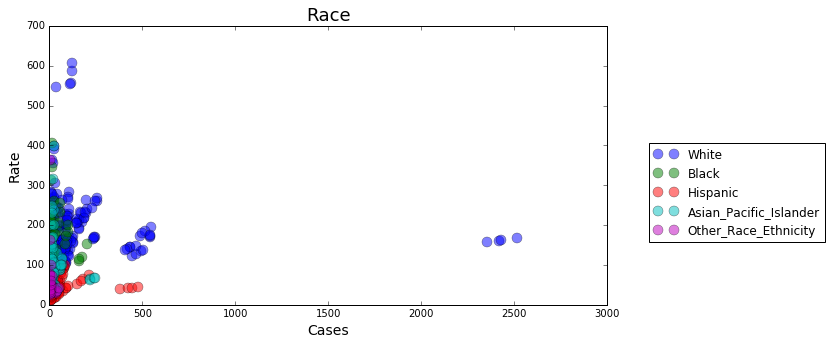

In [6]:
#Checking for race using p-test
non_white = ['Black_Rate','Hispanic_Rate','Other_Race_Ethnicity_Rate']

#White
print 'Testing against White:'
for race in non_white:
    t = ptest(dat['White_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#Asian
print '\nTesting against Asian Pacific Islander:'
for race in non_white:
    t = ptest(dat['Asian_Pacific_Islander_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#White vs Asian
print '\nTesting against Asian Pacific Islander:'
t = ptest(dat['Asian_Pacific_Islander_Rate'],dat['White_Rate'])
if t:
    print 'Difference is significant'
else:
    print 'Difference is not significant'

#Scatter
all_race = ['White','Black','Hispanic','Asian_Pacific_Islander','Other_Race_Ethnicity']
plt.figure(figsize=(10,5))
for race in all_race:
    plt.plot(dat[race+'_Cases'],dat[race+'_Rate'], 'o', markersize=10, alpha=0.5)
plt.title('Race', fontsize=18)
plt.xlabel('Cases', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(all_race, bbox_to_anchor=(1.4, 0.6))

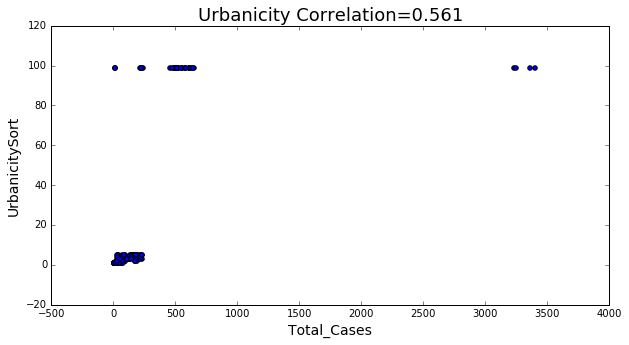

In [7]:
#Check for urbanicity
a = corr(dat['Total_Cases'],dat['UrbanicitySort'])
plt.figure(figsize=(10,5))
plt.scatter(dat['Total_Cases'],dat['UrbanicitySort'])
plt.title('Urbanicity Correlation=%.3f'%a, fontsize=18)
plt.xlabel('Total_Cases', fontsize=14)
plt.ylabel('UrbanicitySort', fontsize=14)

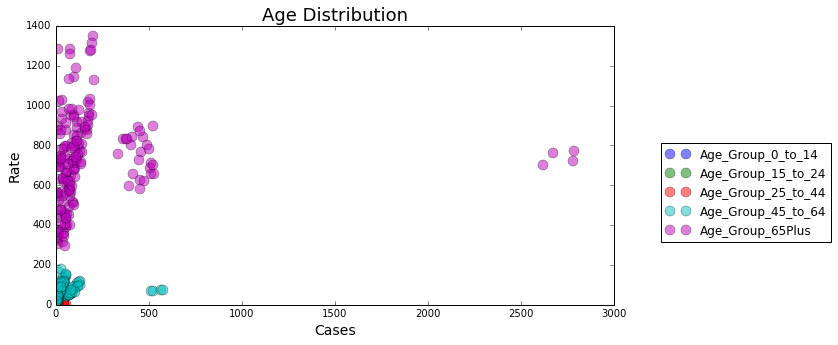

In [8]:
#Check for age

ages=['Age_Group_0_to_14','Age_Group_15_to_24','Age_Group_25_to_44',
      'Age_Group_45_to_64','Age_Group_65Plus']

plt.figure(figsize=(10,5))
for age in ages:
    plt.plot(dat[age+'_Cases'],dat[age+'_Rate'], 'o', markersize=10, alpha=0.5)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Cases', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(ages, bbox_to_anchor=(1.4, 0.6))

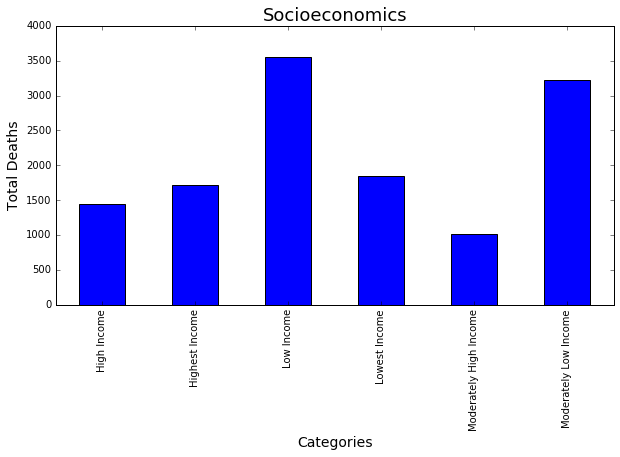

In [9]:
#Check Socioeconomics

dat2= dat.groupby(['Socioeconomic_Category']).sum()
plt.figure(figsize=(10,5))
dat2['Total_Cases'].plot(kind='bar')
plt.title('Socioeconomics', fontsize=18)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

###Analyze Emergency Department Dischanrge

In [10]:
dat = pd.read_excel(path, sheetname='CHD_EDD_2010-2013')
dat.columns

Index([                   u'CONDITION',                      u'OUTCOME',
                               u'YEAR',                    u'Geography',
                             u'SRANum',                    u'RegionNum',
                         u'RegionName',               u'UrbanicitySort',
                      u'UrbanicityCat',                      u'SESSort',
             u'Socioeconomic_Category',                        u'SDNUM',
                u'Supervisor_District',                  u'Total_Cases',
                         u'Total_Rate',            u'Age_Adjusted_Rate',
                         u'Male_Cases',                    u'Male_Rate',
                       u'Female_Cases',                  u'Female_Rate',
                        u'White_Cases',                   u'White_Rate',
                        u'Black_Cases',                   u'Black_Rate',
                     u'Hispanic_Cases',                u'Hispanic_Rate',
       u'Asian_Pacific_Islander_Cases',  u'Asian_Pa

In [11]:
#Checking for gender using p-test
gender_test = ptest(dat['Male_Rate'],dat['Female_Rate'])
if gender_test:
    print 'Gender affects ashtma.'
else:
    print 'Gender doesnt affects ashtma.'

Gender doesnt affects ashtma.


Testing against White:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Difference is not significant


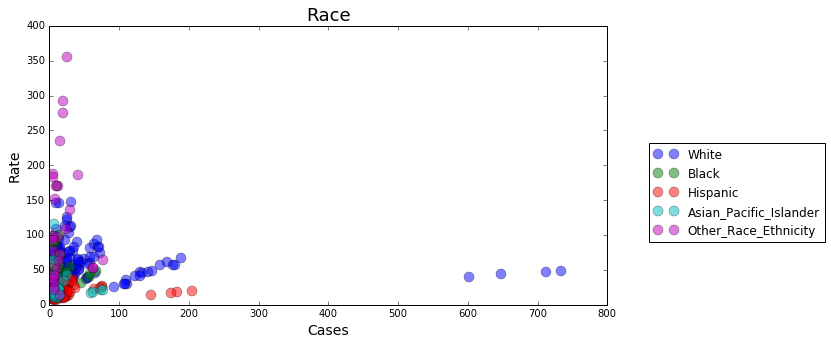

In [12]:
#Checking for race using p-test
non_white = ['Black_Rate','Hispanic_Rate','Other_Race_Ethnicity_Rate']

#White
print 'Testing against White:'
for race in non_white:
    t = ptest(dat['White_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#Asian
print '\nTesting against Asian Pacific Islander:'
for race in non_white:
    t = ptest(dat['Asian_Pacific_Islander_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#White vs Asian
print '\nTesting against Asian Pacific Islander:'
t = ptest(dat['Asian_Pacific_Islander_Rate'],dat['White_Rate'])
if t:
    print 'Difference is significant'
else:
    print 'Difference is not significant'

#Scatter
all_race = ['White','Black','Hispanic','Asian_Pacific_Islander','Other_Race_Ethnicity']
plt.figure(figsize=(10,5))
for race in all_race:
    plt.plot(dat[race+'_Cases'],dat[race+'_Rate'], 'o', markersize=10, alpha=0.5)
plt.title('Race', fontsize=18)
plt.xlabel('Cases', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(all_race, bbox_to_anchor=(1.4, 0.6))

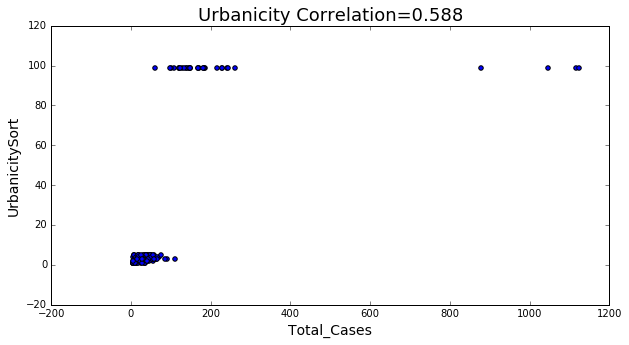

In [13]:
#Check for urbanicity
a = corr(dat['Total_Cases'],dat['UrbanicitySort'])
plt.figure(figsize=(10,5))
plt.scatter(dat['Total_Cases'],dat['UrbanicitySort'])
plt.title('Urbanicity Correlation=%.3f'%a, fontsize=18)
plt.xlabel('Total_Cases', fontsize=14)
plt.ylabel('UrbanicitySort', fontsize=14)

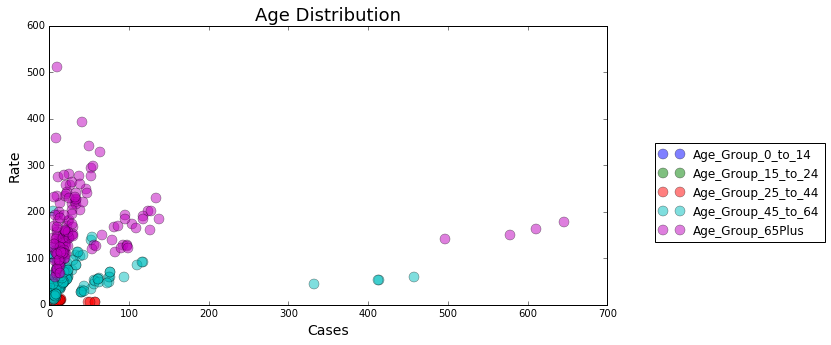

In [14]:
#Check for age

ages=['Age_Group_0_to_14','Age_Group_15_to_24','Age_Group_25_to_44',
      'Age_Group_45_to_64','Age_Group_65Plus']

plt.figure(figsize=(10,5))
for age in ages:
    plt.plot(dat[age+'_Cases'],dat[age+'_Rate'], 'o', markersize=10, alpha=0.5)
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Cases', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(ages, bbox_to_anchor=(1.4, 0.6))

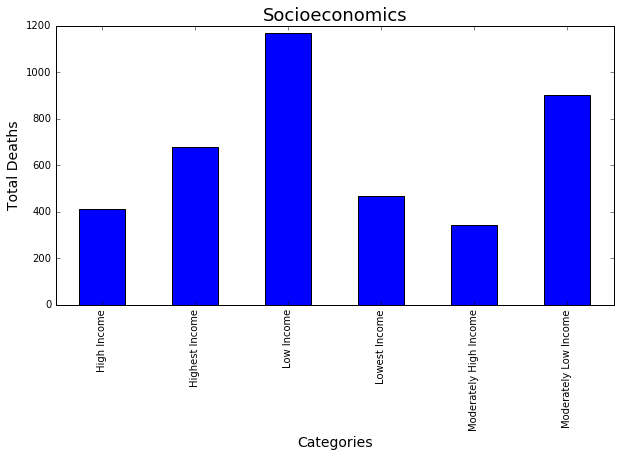

In [15]:
#Check Socioeconomics

dat2= dat.groupby(['Socioeconomic_Category']).sum()
plt.figure(figsize=(10,5))
dat2['Total_Cases'].plot(kind='bar')
plt.title('Socioeconomics', fontsize=18)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)

###Analyze Hospitalization

In [16]:
dat = pd.read_excel(path, sheetname='CHD_Hosp_2010-2013')
dat.columns

Index([                   u'CONDITION',                      u'OUTCOME',
                               u'YEAR',                    u'Geography',
                             u'SRANum',                    u'RegionNum',
                         u'RegionName',               u'UrbanicitySort',
                      u'UrbanicityCat',                      u'SESSort',
             u'Socioeconomic_Category',                        u'SDNUM',
                u'Supervisor_District',                  u'Total_Cases',
                         u'Total_Rate',            u'Age_Adjusted_Rate',
                         u'Male_Cases',                    u'Male_Rate',
                       u'Female_Cases',                  u'Female_Rate',
                        u'White_Cases',                   u'White_Rate',
                        u'Black_Cases',                   u'Black_Rate',
                     u'Hispanic_Cases',                u'Hispanic_Rate',
       u'Asian_Pacific_Islander_Cases',  u'Asian_Pa

In [17]:
#Checking for gender using p-test
gender_test = ptest(dat['Male_Rate'],dat['Female_Rate'])
if gender_test:
    print 'Gender affects ashtma.'
else:
    print 'Gender doesnt affects ashtma.'

Gender doesnt affects ashtma.


Testing against White:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Black is not significant
Hispanic is not significant
Other_Race_Ethnicity is not significant

Testing against Asian Pacific Islander:
Difference is not significant


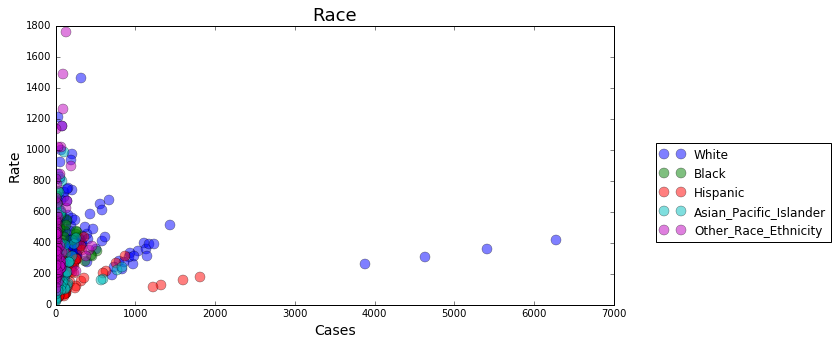

In [18]:
#Checking for race using p-test
non_white = ['Black_Rate','Hispanic_Rate','Other_Race_Ethnicity_Rate']

#White
print 'Testing against White:'
for race in non_white:
    t = ptest(dat['White_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#Asian
print '\nTesting against Asian Pacific Islander:'
for race in non_white:
    t = ptest(dat['Asian_Pacific_Islander_Rate'],dat[race])
    if t:
        print race[:-5],'is significant'
    else:
        print race[:-5],'is not significant'

#White vs Asian
print '\nTesting against Asian Pacific Islander:'
t = ptest(dat['Asian_Pacific_Islander_Rate'],dat['White_Rate'])
if t:
    print 'Difference is significant'
else:
    print 'Difference is not significant'

#Scatter
all_race = ['White','Black','Hispanic','Asian_Pacific_Islander','Other_Race_Ethnicity']
plt.figure(figsize=(10,5))
for race in all_race:
    plt.plot(dat[race+'_Cases'],dat[race+'_Rate'], 'o', markersize=10, alpha=0.5)
plt.title('Race', fontsize=18)
plt.xlabel('Cases', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.legend(all_race, bbox_to_anchor=(1.4, 0.6))

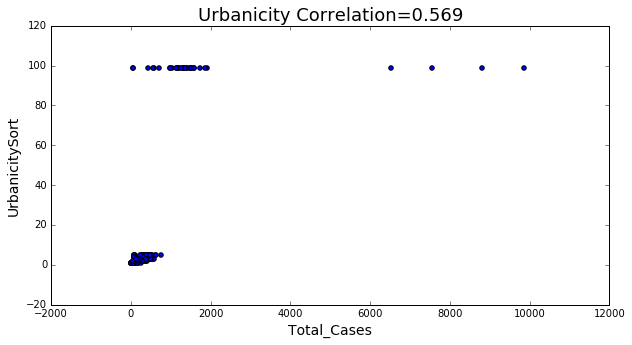

In [19]:
#Check for urbanicity
a = corr(dat['Total_Cases'],dat['UrbanicitySort'])
plt.figure(figsize=(10,5))
plt.scatter(dat['Total_Cases'],dat['UrbanicitySort'])
plt.title('Urbanicity Correlation=%.3f'%a, fontsize=18)
plt.xlabel('Total_Cases', fontsize=14)
plt.ylabel('UrbanicitySort', fontsize=14)

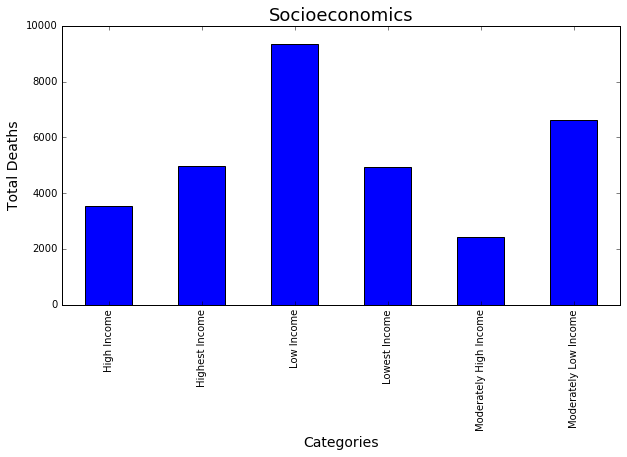

In [20]:
#Check Socioeconomics

dat2= dat.groupby(['Socioeconomic_Category']).sum()
plt.figure(figsize=(10,5))
dat2['Total_Cases'].plot(kind='bar')
plt.title('Socioeconomics', fontsize=18)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Total Deaths', fontsize=14)